In [1]:
import requests

from urllib.parse import quote_plus, unquote_plus

In [2]:
query = input()

In [3]:
base_uri = 'https://ru.wikipedia.org'

In [4]:
def get_article(query: str):
	url = f'{base_uri}/w/api.php?action=parse&page={query}&format=json'
	response = requests.get(url)
	data = response.json()
	return data

In [5]:
article = get_article(query)

In [6]:
import bs4

def get_parsed_html(article: dict) -> bs4.BeautifulSoup:
	html = article['parse']['text']['*']
	soup = bs4.BeautifulSoup(html, 'html.parser')
	return soup

def find_important_links(soup: bs4.BeautifulSoup) -> list:
    links = []
    soup = soup.find('div', class_='mw-parser-output')
    
    # Попробуем найти первый параграф
    first_p = soup.find('p', recursive=False)
    if first_p is None:
        return links  # Возвращаем пустой список, если нет первого параграфа

    # Попробуем найти второй параграф
    second_p = first_p.find_next_sibling('p', recursive=False)

    a_tags = first_p.find_all('a', href=True)
    if second_p is not None:
        a_tags += second_p.find_all('a', href=True)

    for a in a_tags:
        href = a.get('href')
        if href.startswith('/wiki/') and not href.startswith(f'/wiki/{quote_plus("Файл")}:'):
            links.append({
                'title': a.get('title') if a.get('title') else a.text,
                'href': href
            })
    
    return links


In [7]:
soup = get_parsed_html(article)

graph = {}

links = find_important_links(soup)

for link in links:
	print(link['title'])
	child_article = get_article(link['title'])
	if 'parse' in article:
		if 'text' in child_article['parse']:
			soup = get_parsed_html(child_article)
			links_in_child_article = find_important_links(soup)
			graph[link['title']] = links_in_child_article
			for link_in_child_article in links_in_child_article:
				print(f'\t{link_in_child_article['title']}')

print(graph)


Английский язык
	Англо-фризские языки
	Германские языки
	Индоевропейские языки
	Международный язык
	Британская Империя
	Соединённые Штаты Америки
	Диалекты английского языка
	Говор
	Раннее Средневековье
	Древнеанглийский язык
	Англосаксы
	Азия
	Африка
	Северная Америка
	Австралия (континент)
	Соединённые Штаты Америки
	Канада
	Австралия
	Новая Зеландия
	Индия
	Нигерия
Компьютерная память
	Запоминающее устройство
	Вычислительная машина
	Данные (вычислительная техника)
	Центральный процессор
	Иерархия памяти
	Запоминающее устройство
	Персональный компьютер
	DRAM
	ОЗУ
Полупроводниковые материалы
	Полупроводник
	Удельная проводимость
	Кристаллическая структура
	Аморфные тела
	Жидкость
Энергозависимая память
	Английский язык
	Компьютерная память
	Энергонезависимая память
	Английский язык
	Оперативная память
	Запоминающее устройство с произвольным доступом
	DRAM
	SRAM (память)
	Ассоциативная память
	DPRAM
	Память на линиях задержки
	Запоминающая электронно-лучевая трубка
Ячейка памяти
	Компь

In [8]:
import graphviz

dot = graphviz.Digraph()
dot.node(query)

for parent, children in graph.items():
	dot.node(parent)
	dot.edge(query, parent)
	for child in children:
		dot.node(child['title'])
		dot.edge(parent, child['title'])


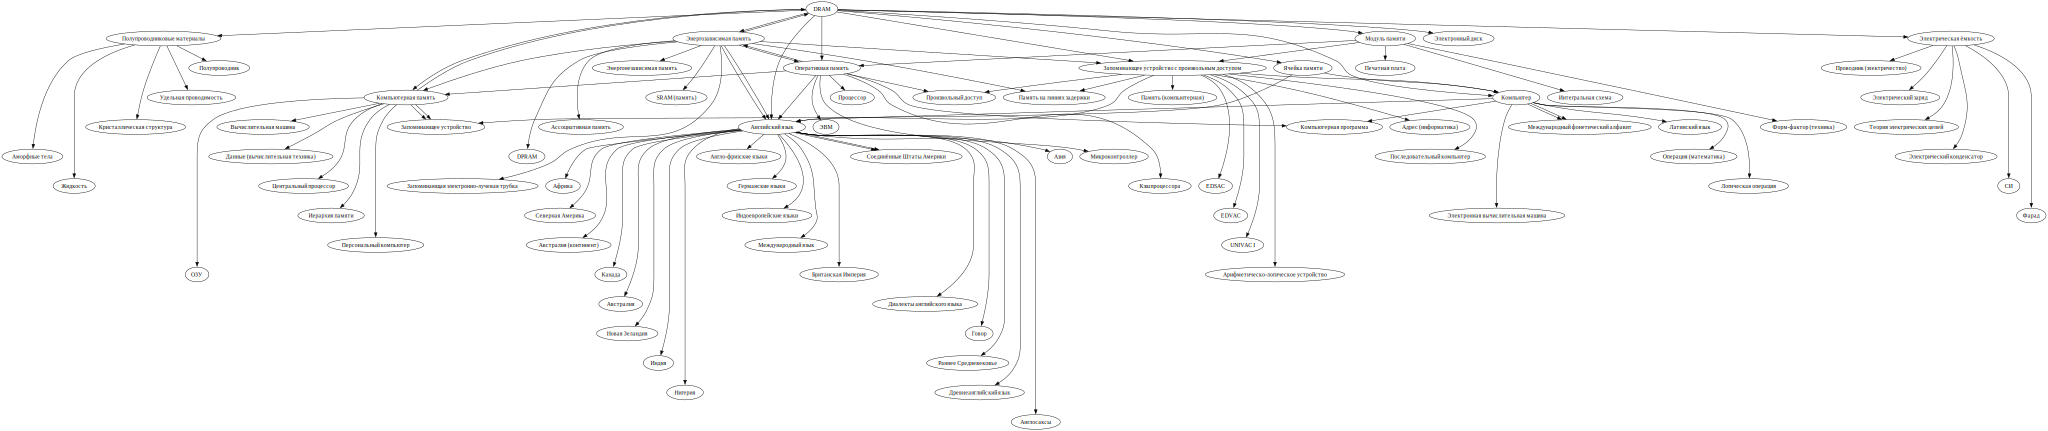

In [9]:
dot.unflatten(stagger=10)